In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [34]:
df=pd.read_csv('data/stud.csv')

In [35]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [36]:
df.shape

(1000, 8)

In [37]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [38]:
df.duplicated().sum()

np.int64(0)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [40]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [41]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [42]:
categorical_columns=[feature for feature in df.columns if df[feature].dtypes=='O']
for col in categorical_columns:
    print('Number of categories in {}: {}'.format(col,df[col].nunique()))
    print('Categories in {}: {}'.format(col,df[col].unique()))
    print(" ")

Number of categories in gender: 2
Categories in gender: ['female' 'male']
 
Number of categories in race/ethnicity: 5
Categories in race/ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']
 
Number of categories in parental level of education: 6
Categories in parental level of education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
 
Number of categories in lunch: 2
Categories in lunch: ['standard' 'free/reduced']
 
Number of categories in test preparation course: 2
Categories in test preparation course: ['none' 'completed']
 


In [43]:
numerical_columns=[feature for feature in df.columns if df[feature].dtypes!='O']
print('Numerical columns are {}'.format(numerical_columns))

Numerical columns are ['math score', 'reading score', 'writing score']


In [44]:
df.rename(columns={
    'math score': 'math_score',
    'reading score': 'reading_score',
    'writing score': 'writing_score'
}, inplace=True)


In [45]:
df['total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['average_score']=np.round(df['total_score']/3,2)

In [46]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [47]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.columns

Index(['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average_score'],
      dtype='object')

In [50]:
print(df.columns.tolist())


['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course', 'math_score', 'reading_score', 'writing_score', 'total_score', 'average_score']


In [51]:
#performance in each subject
numerical_columns = ['math_score', 'reading_score', 'writing_score']

for col in numerical_columns:
    print(f'Number of students with {col} less than 50: {df[df[col] <= 50].shape[0]}')
    print(f'Number of students with {col} more than 80: {df[df[col] >= 80].shape[0]}')
    print()




Number of students with math_score less than 50: 150
Number of students with math_score more than 80: 193

Number of students with reading_score less than 50: 97
Number of students with reading_score more than 80: 249

Number of students with writing_score less than 50: 124
Number of students with writing_score more than 80: 235



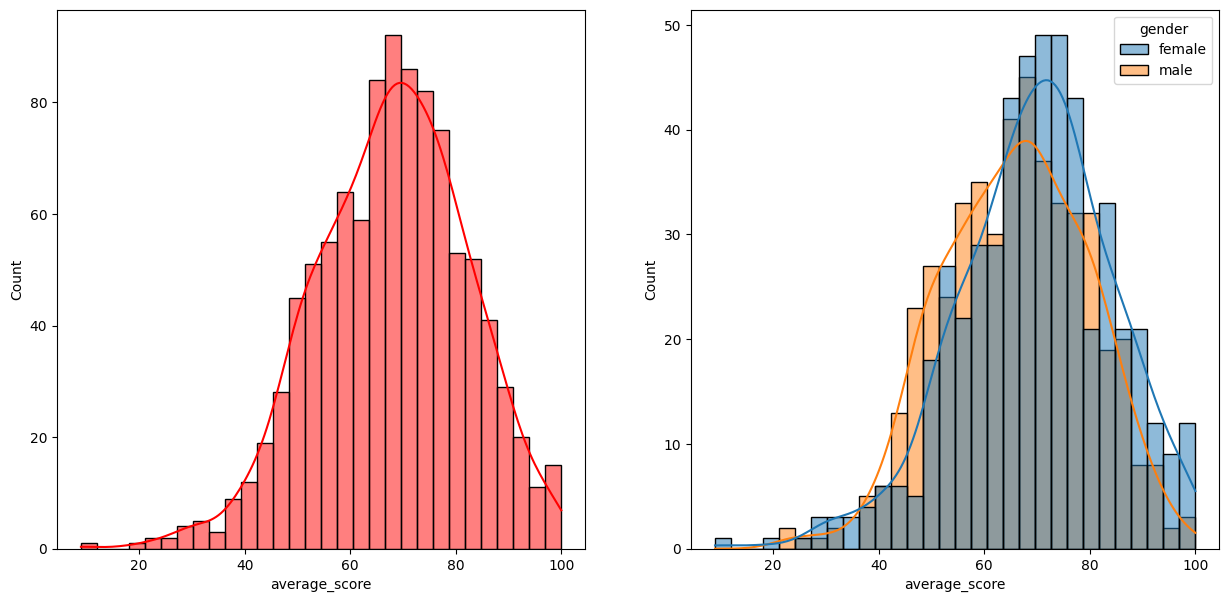

In [52]:
# Histogram and KDE Distribution on distribution of gender
fig,axes=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average_score',bins=30,kde=True,color='r')
plt.subplot(122)
sns.histplot(data=df,x='average_score',bins=30,kde=True,hue='gender')
plt.show()

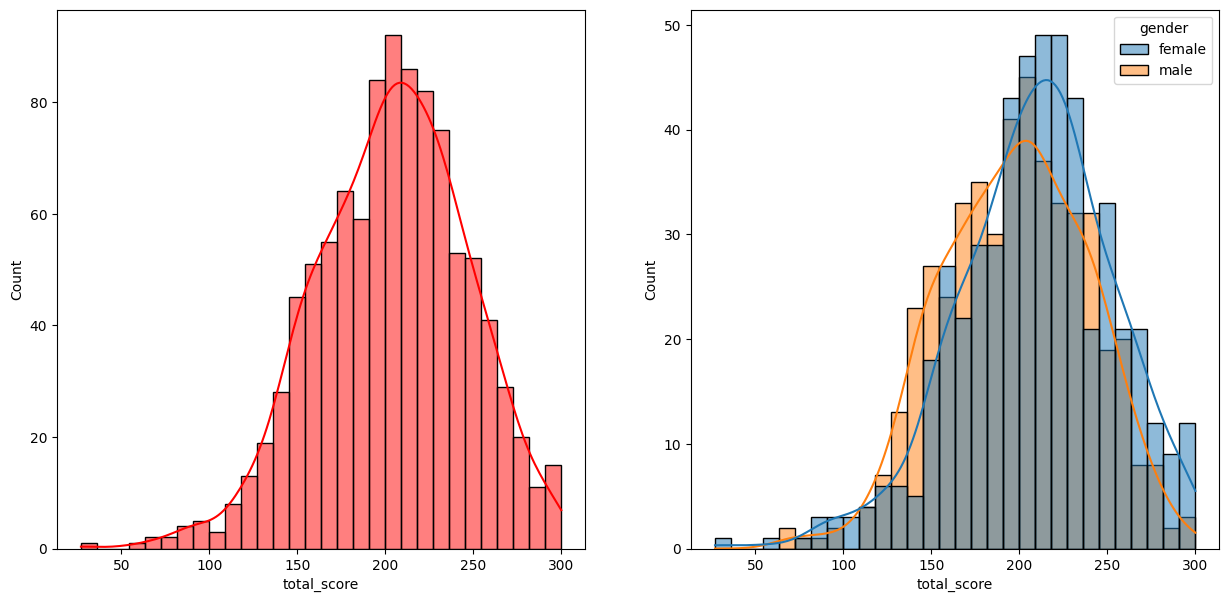

In [53]:
fig,axes=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='r')
plt.subplot(122)
sns.histplot(data=df,x='total_score',bins=30,kde=True,hue='gender')
plt.show()

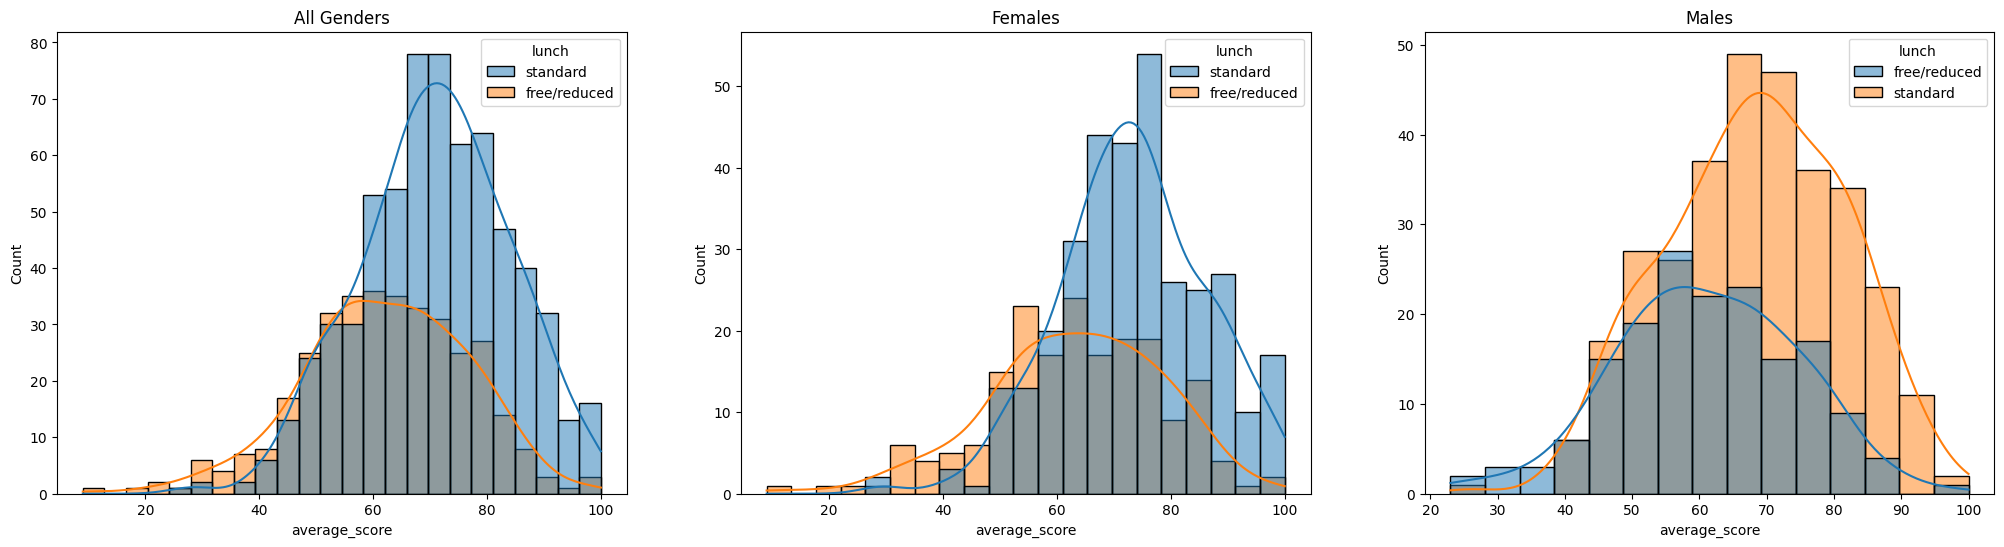

In [54]:
# Histogram and KDE Distribution on distribution of lunch
fig, axes = plt.subplots(1, 3, figsize=(25, 6))


sns.histplot(data=df, x='average_score', kde=True, hue='lunch', ax=axes[0])
axes[0].set_title('All Genders')


sns.histplot(data=df[df['gender'] == 'female'], x='average_score', kde=True, hue='lunch', ax=axes[1])
axes[1].set_title('Females')

sns.histplot(data=df[df['gender'] == 'male'], x='average_score', kde=True, hue='lunch', ax=axes[2])
axes[2].set_title('Males')

plt.show()

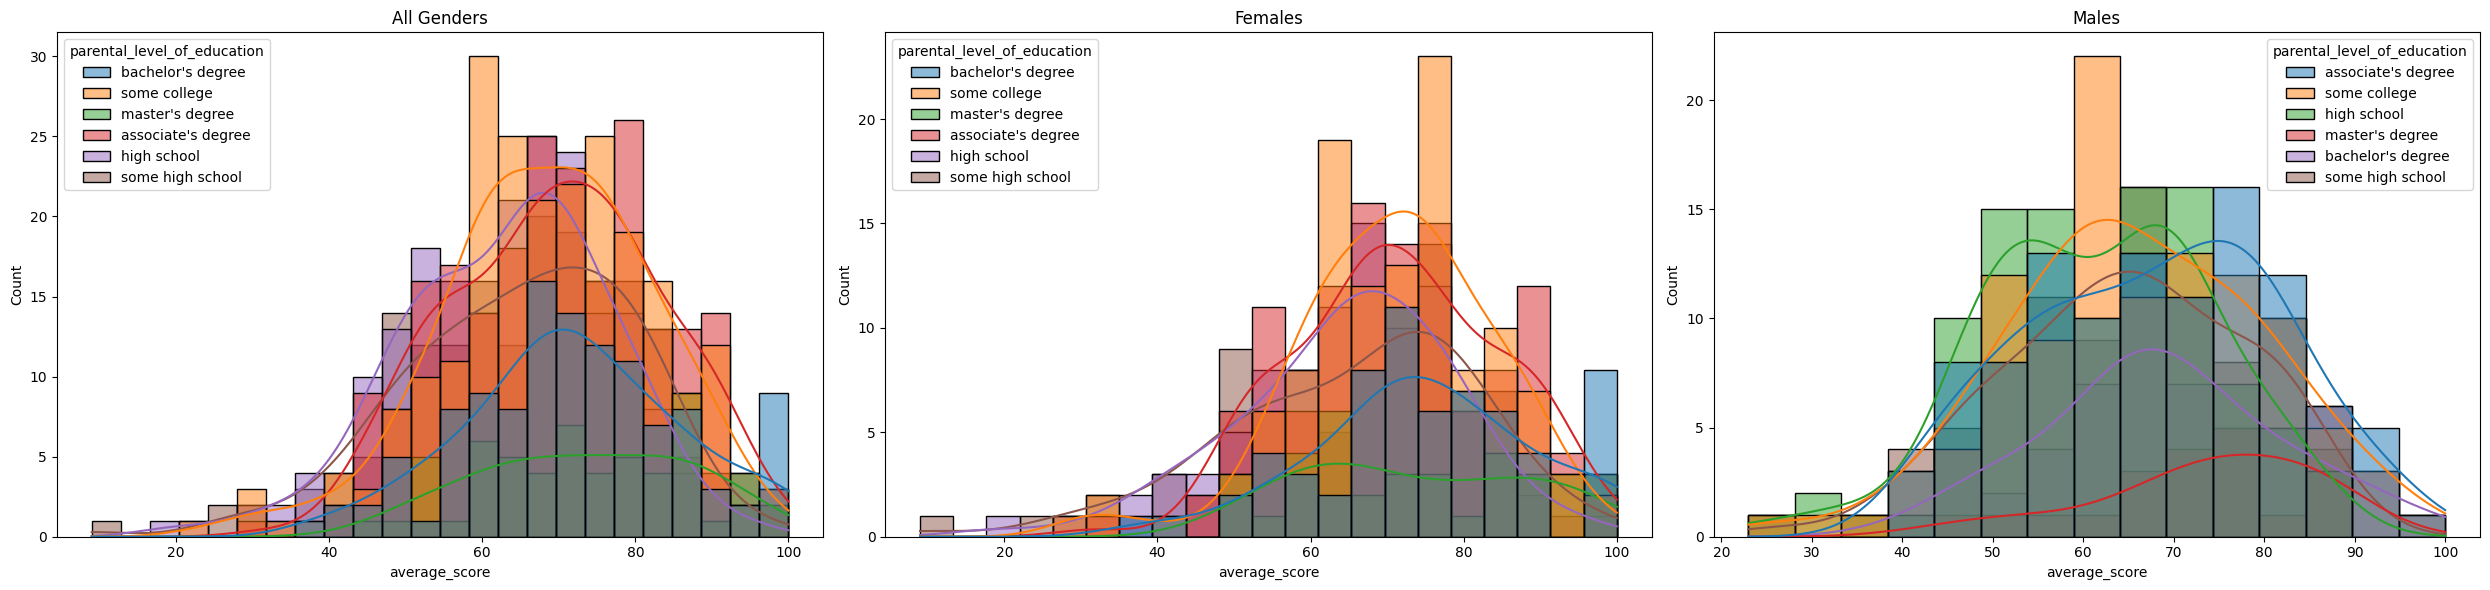

In [55]:
# Histogram and KDE Distribution on distribution of parental level of education
fig, axes = plt.subplots(1, 3, figsize=(25, 6))

sns.histplot(data=df, x='average_score', kde=True, hue='parental_level_of_education', ax=axes[0])
axes[0].set_title('All Genders')

sns.histplot(data=df[df['gender'] == 'female'], x='average_score', kde=True, hue='parental_level_of_education', ax=axes[1])
axes[1].set_title('Females')

sns.histplot(data=df[df['gender'] == 'male'], x='average_score', kde=True, hue='parental_level_of_education', ax=axes[2])
axes[2].set_title('Males')

plt.tight_layout()

plt.show()

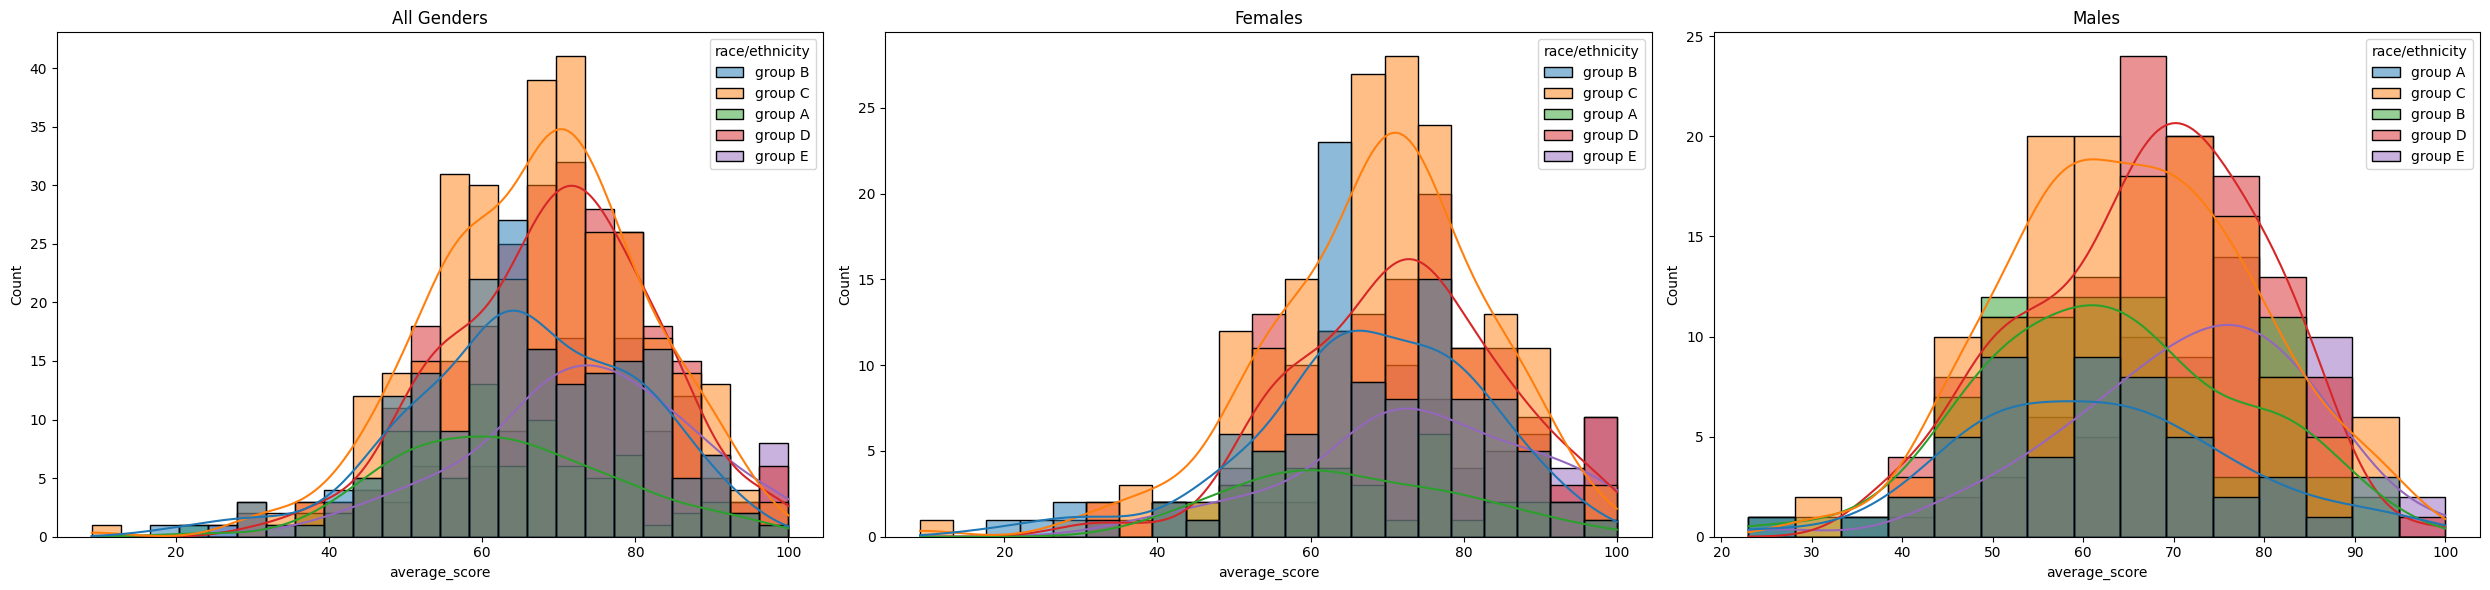

In [57]:
# Histogram and KDE Distribution on distribution of race/ethnicity
fig, axes = plt.subplots(1, 3, figsize=(25, 6))

sns.histplot(data=df, x='average_score', kde=True, hue='race/ethnicity', ax=axes[0])
axes[0].set_title('All Genders')

sns.histplot(data=df[df['gender'] == 'female'], x='average_score', kde=True, hue='race/ethnicity', ax=axes[1])
axes[1].set_title('Females')

sns.histplot(data=df[df['gender'] == 'male'], x='average_score', kde=True, hue='race/ethnicity', ax=axes[2])
axes[2].set_title('Males')

plt.tight_layout()

plt.show()

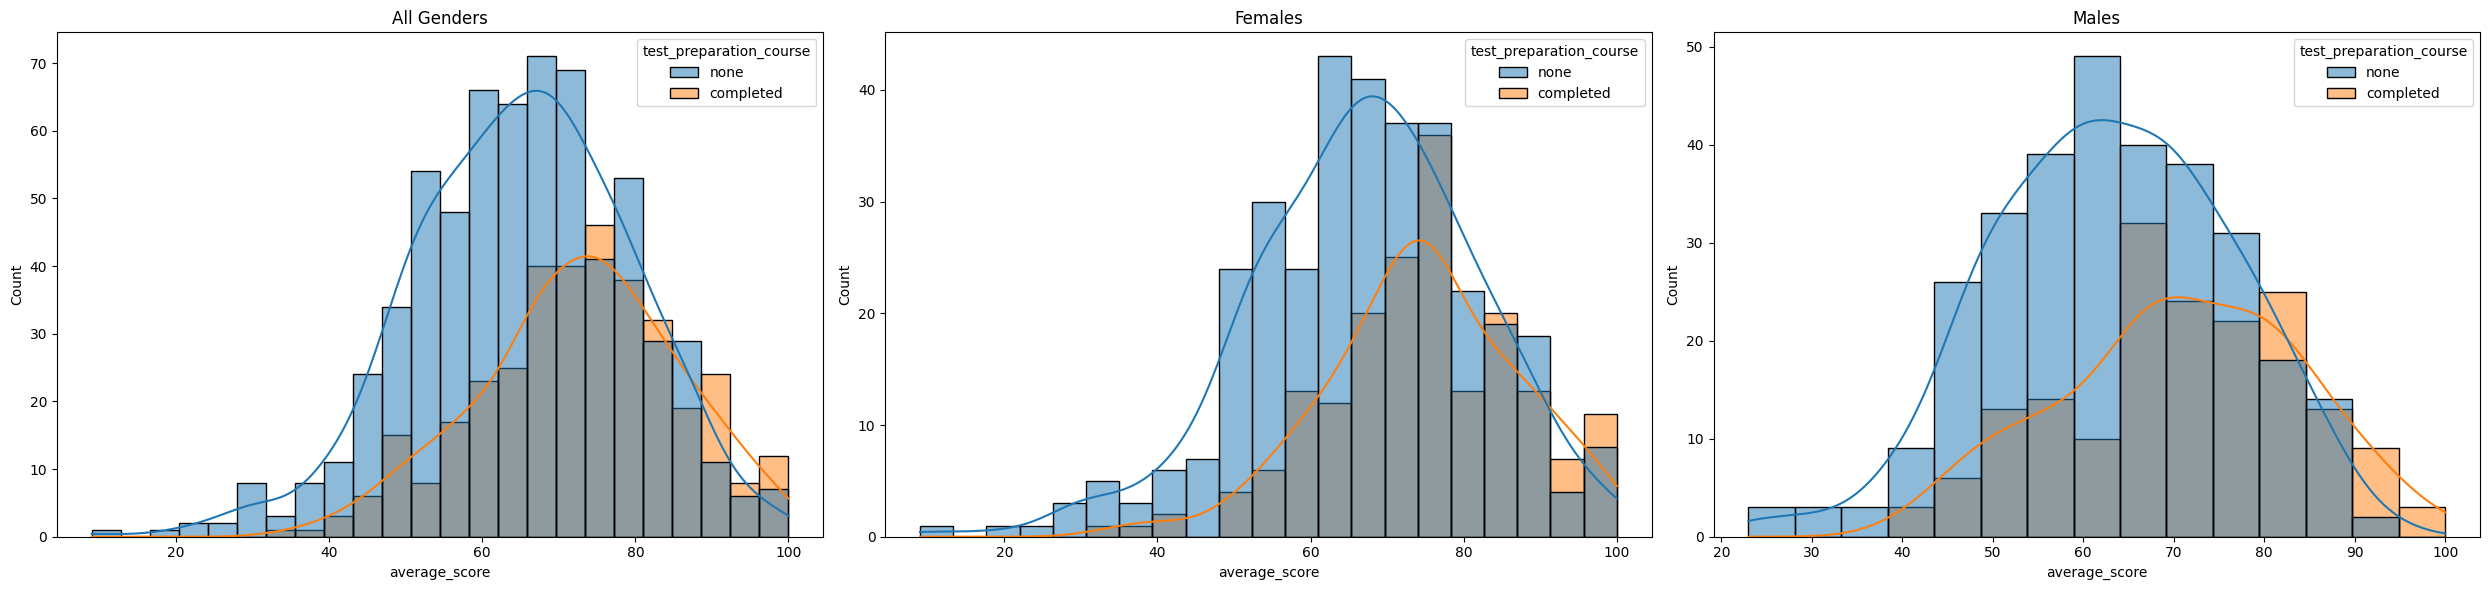

In [58]:
# Histogram and KDE Distribution on distribution of test preparation
fig, axes = plt.subplots(1, 3, figsize=(25, 6))

sns.histplot(data=df, x='average_score', kde=True, hue='test_preparation_course', ax=axes[0])
axes[0].set_title('All Genders')

sns.histplot(data=df[df['gender'] == 'female'], x='average_score', kde=True, hue='test_preparation_course', ax=axes[1])
axes[1].set_title('Females')

sns.histplot(data=df[df['gender'] == 'male'], x='average_score', kde=True, hue='test_preparation_course', ax=axes[2])
axes[2].set_title('Males')

plt.tight_layout()

plt.show()

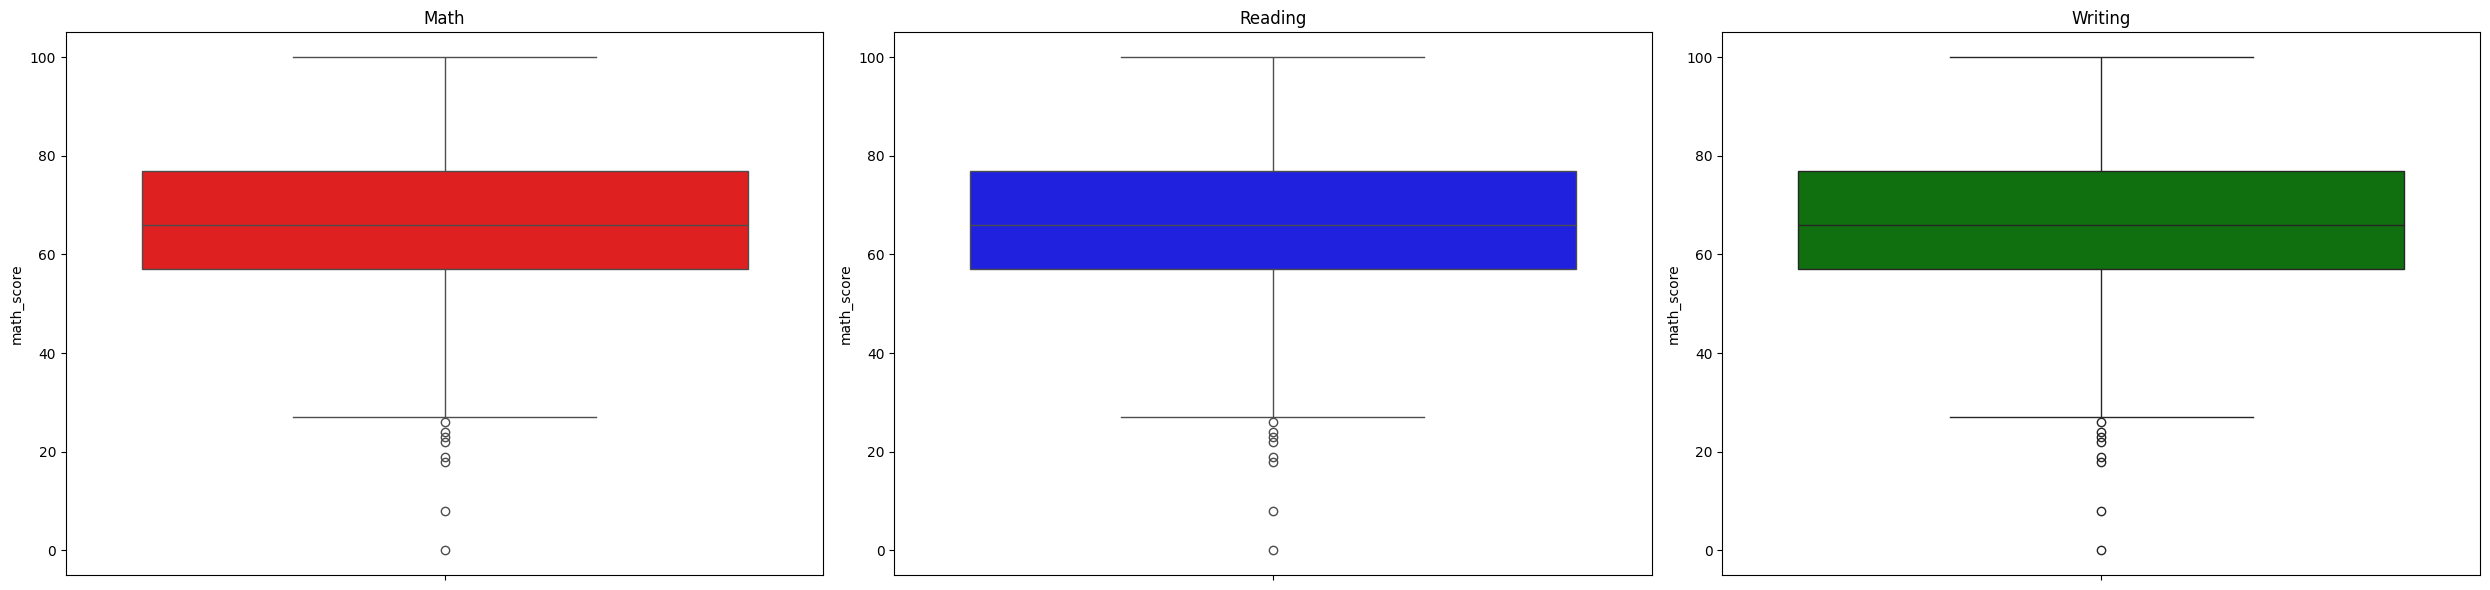

In [ ]:
# Box Plot of Score for Different Subjects
fig,axes=plt.subplots(1,3,figsize=(25,6))

sns.boxplot(data=df,y='math_score',ax=axes[0],color='r')
axes[0].set_title('Math')

sns.boxplot(data=df,y='math_score',ax=axes[1],color='b')
axes[1].set_title('Reading')

sns.boxplot(data=df,y='math_score',ax=axes[2],color='g')
axes[2].set_title('Writing')

plt.tight_layout()
plt.show()
# observation-In each case most of the marks lie in the range of 60-80

In [66]:
categorical_columns = df.select_dtypes(include='object').columns.tolist()

categorical_columns

['gender',
 'race/ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

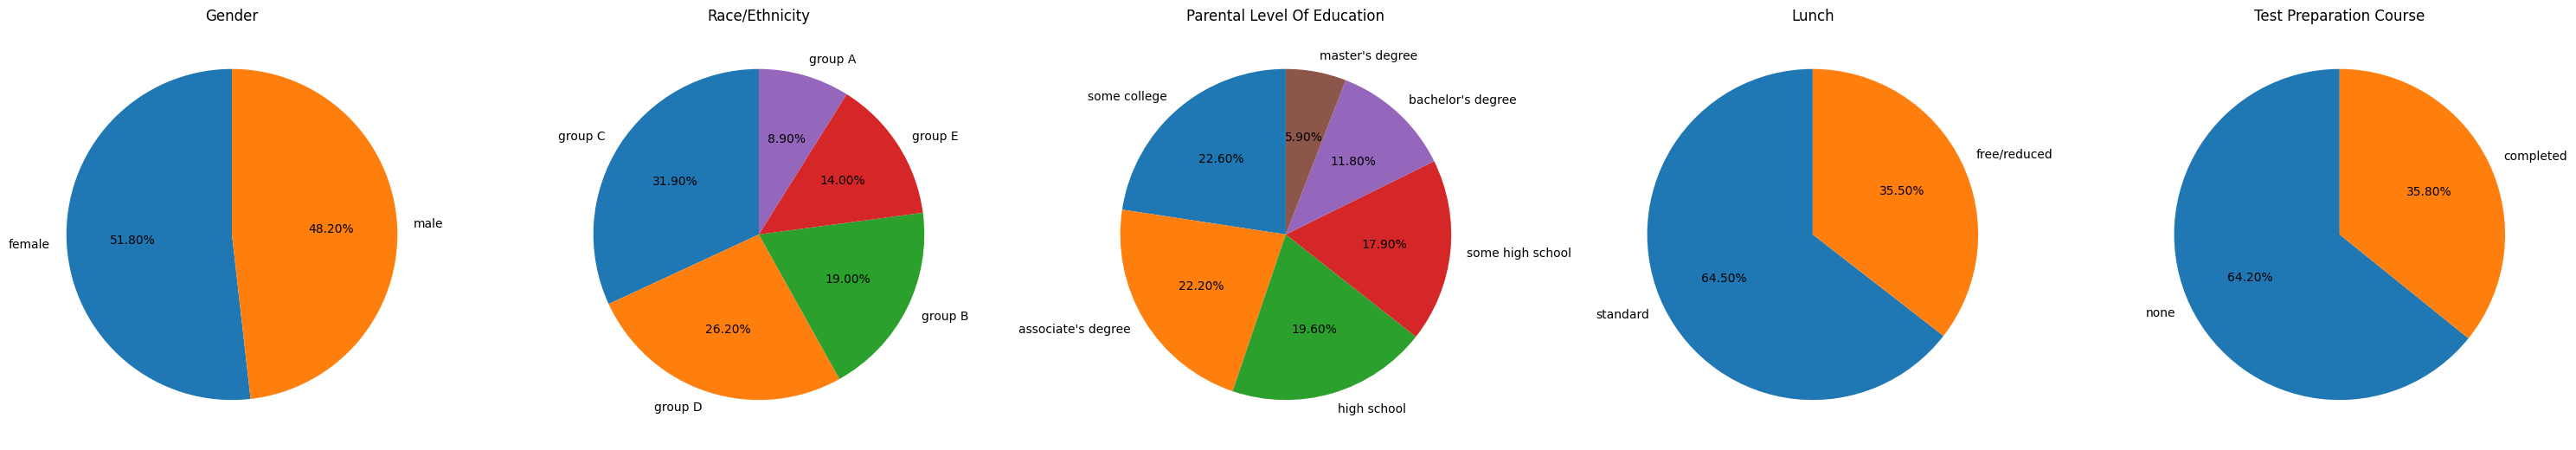

In [62]:
fig, axes = plt.subplots(1, len(categorical_columns), figsize=(30, 12))

for i, col in enumerate(categorical_columns):
    data = df[col].value_counts()
    axes[i].pie(data.values, labels=data.index, autopct='%.2f%%', startangle=90)
    axes[i].set_title(col.replace('_', ' ').title())  # prettier labels

plt.tight_layout()
plt.show()


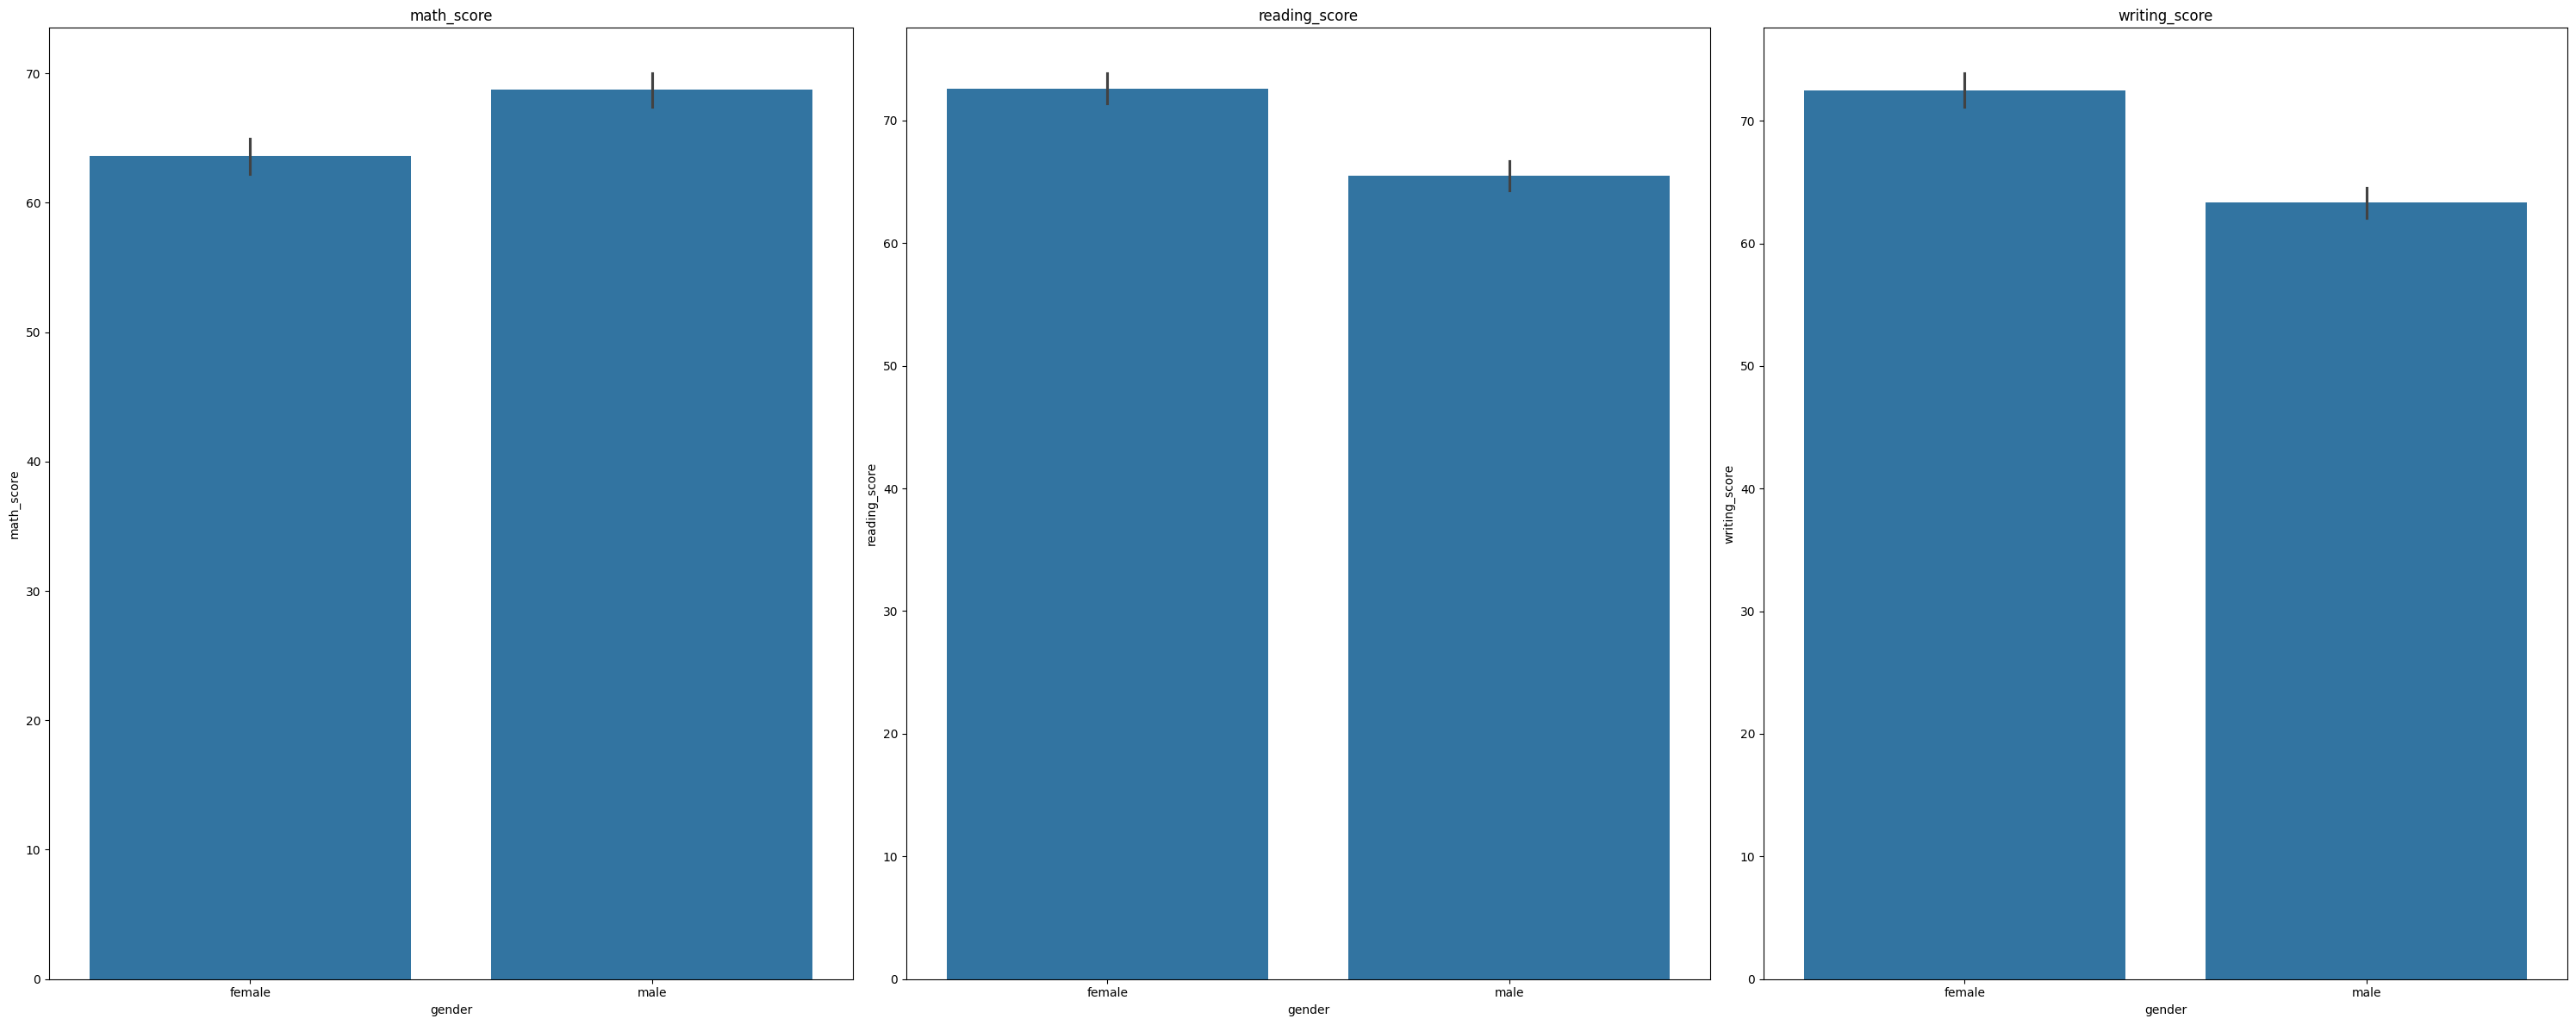

In [64]:
# Gender Comparison for each subject
fig,axes=plt.subplots(1,len(numerical_columns),figsize=(30,12))

for i,col in enumerate(numerical_columns):
    sns.barplot(data=df,x='gender',y=col,ax=axes[i],estimator='mean')
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

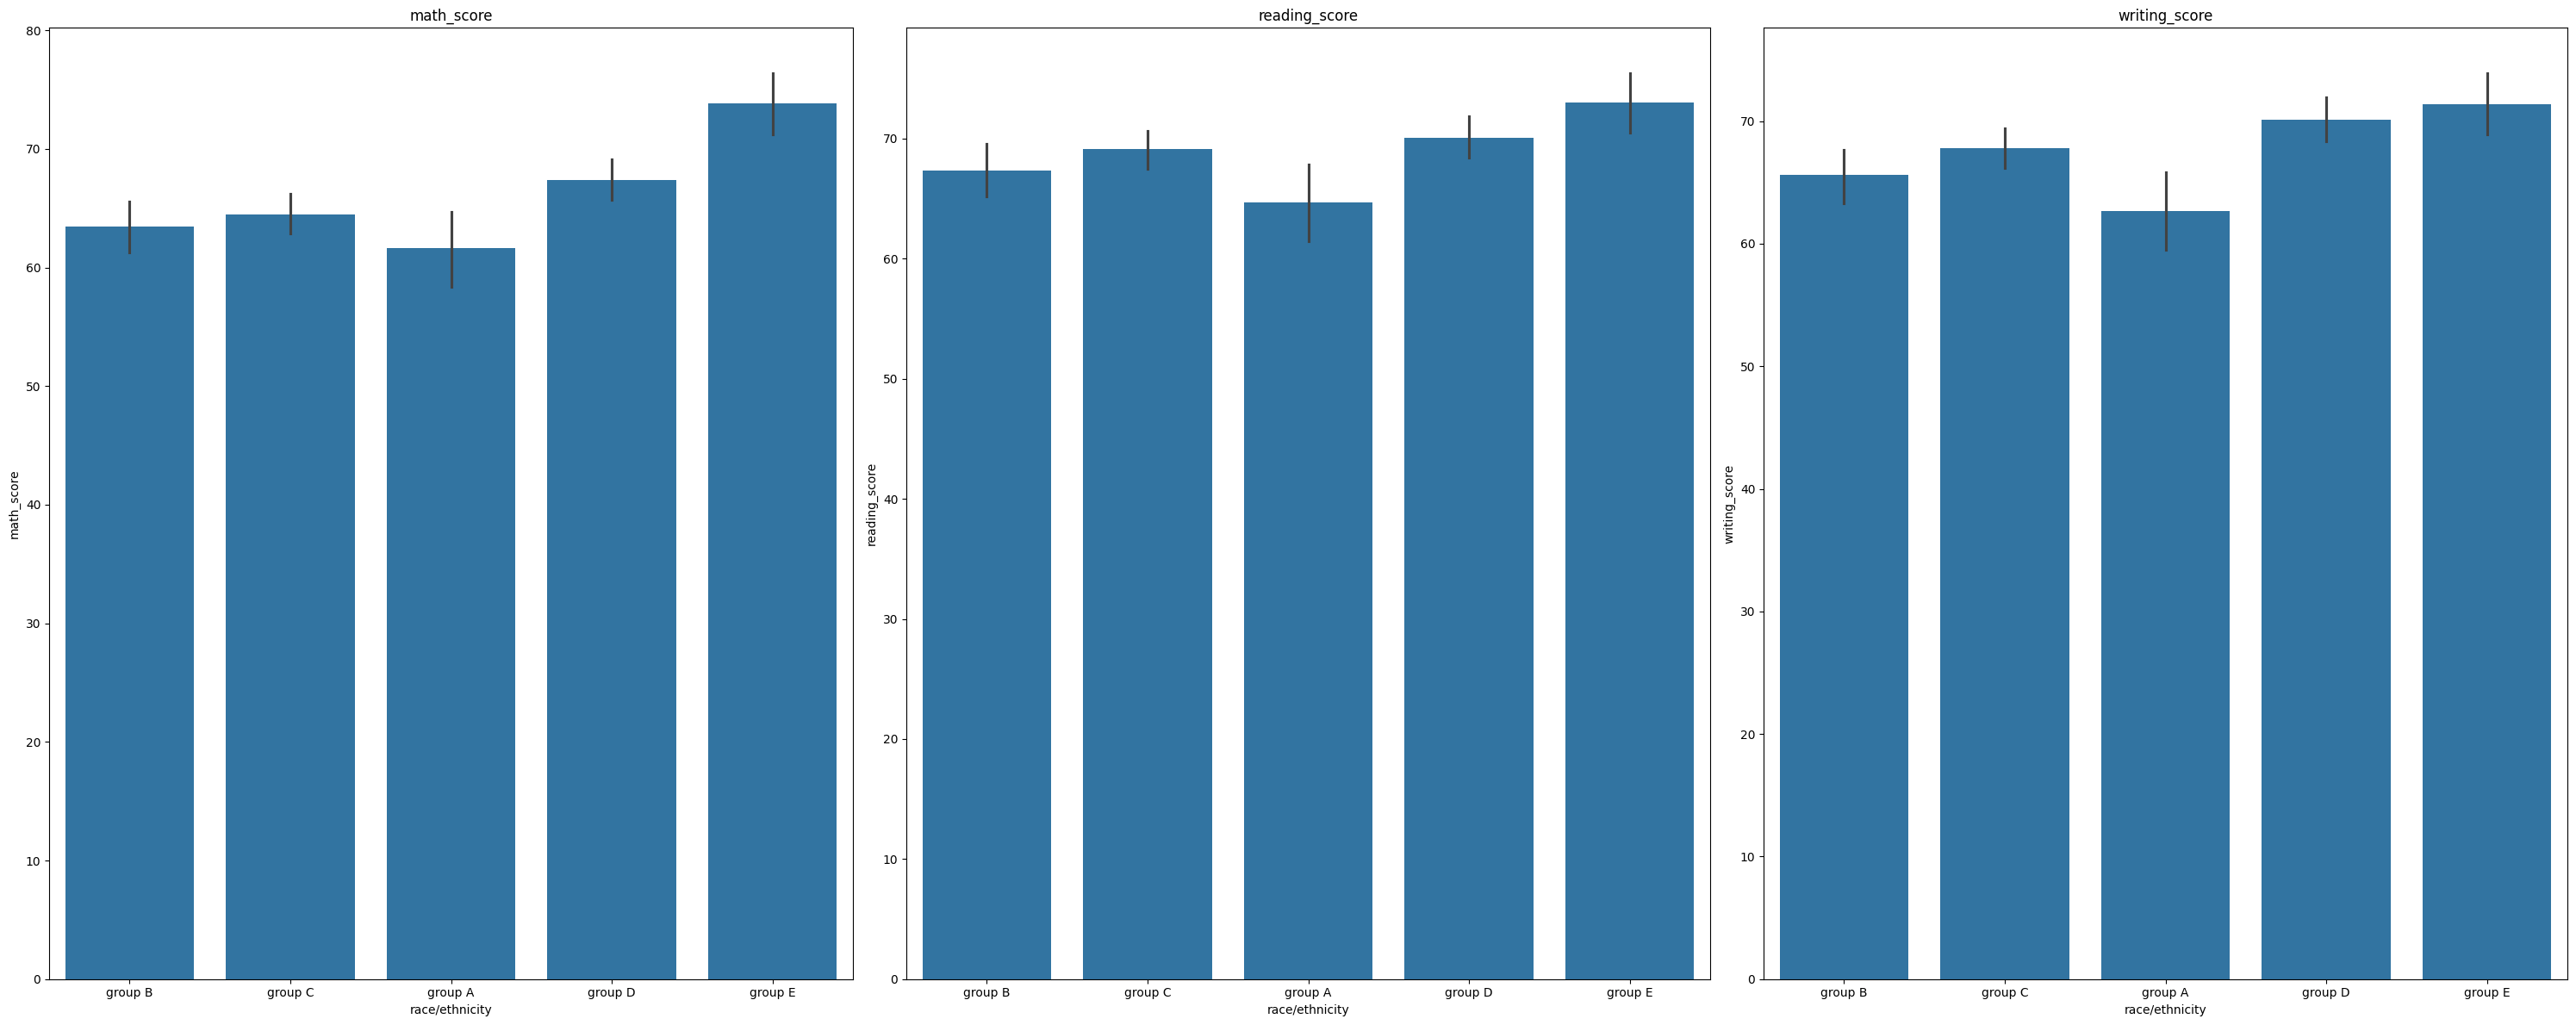

In [67]:
# Race/Ethnicity comparison for each subject
fig,axes=plt.subplots(1,len(numerical_columns),figsize=(30,12))

for i,col in enumerate(numerical_columns):
    sns.barplot(data=df,x='race/ethnicity',y=col,ax=axes[i],estimator='mean')
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

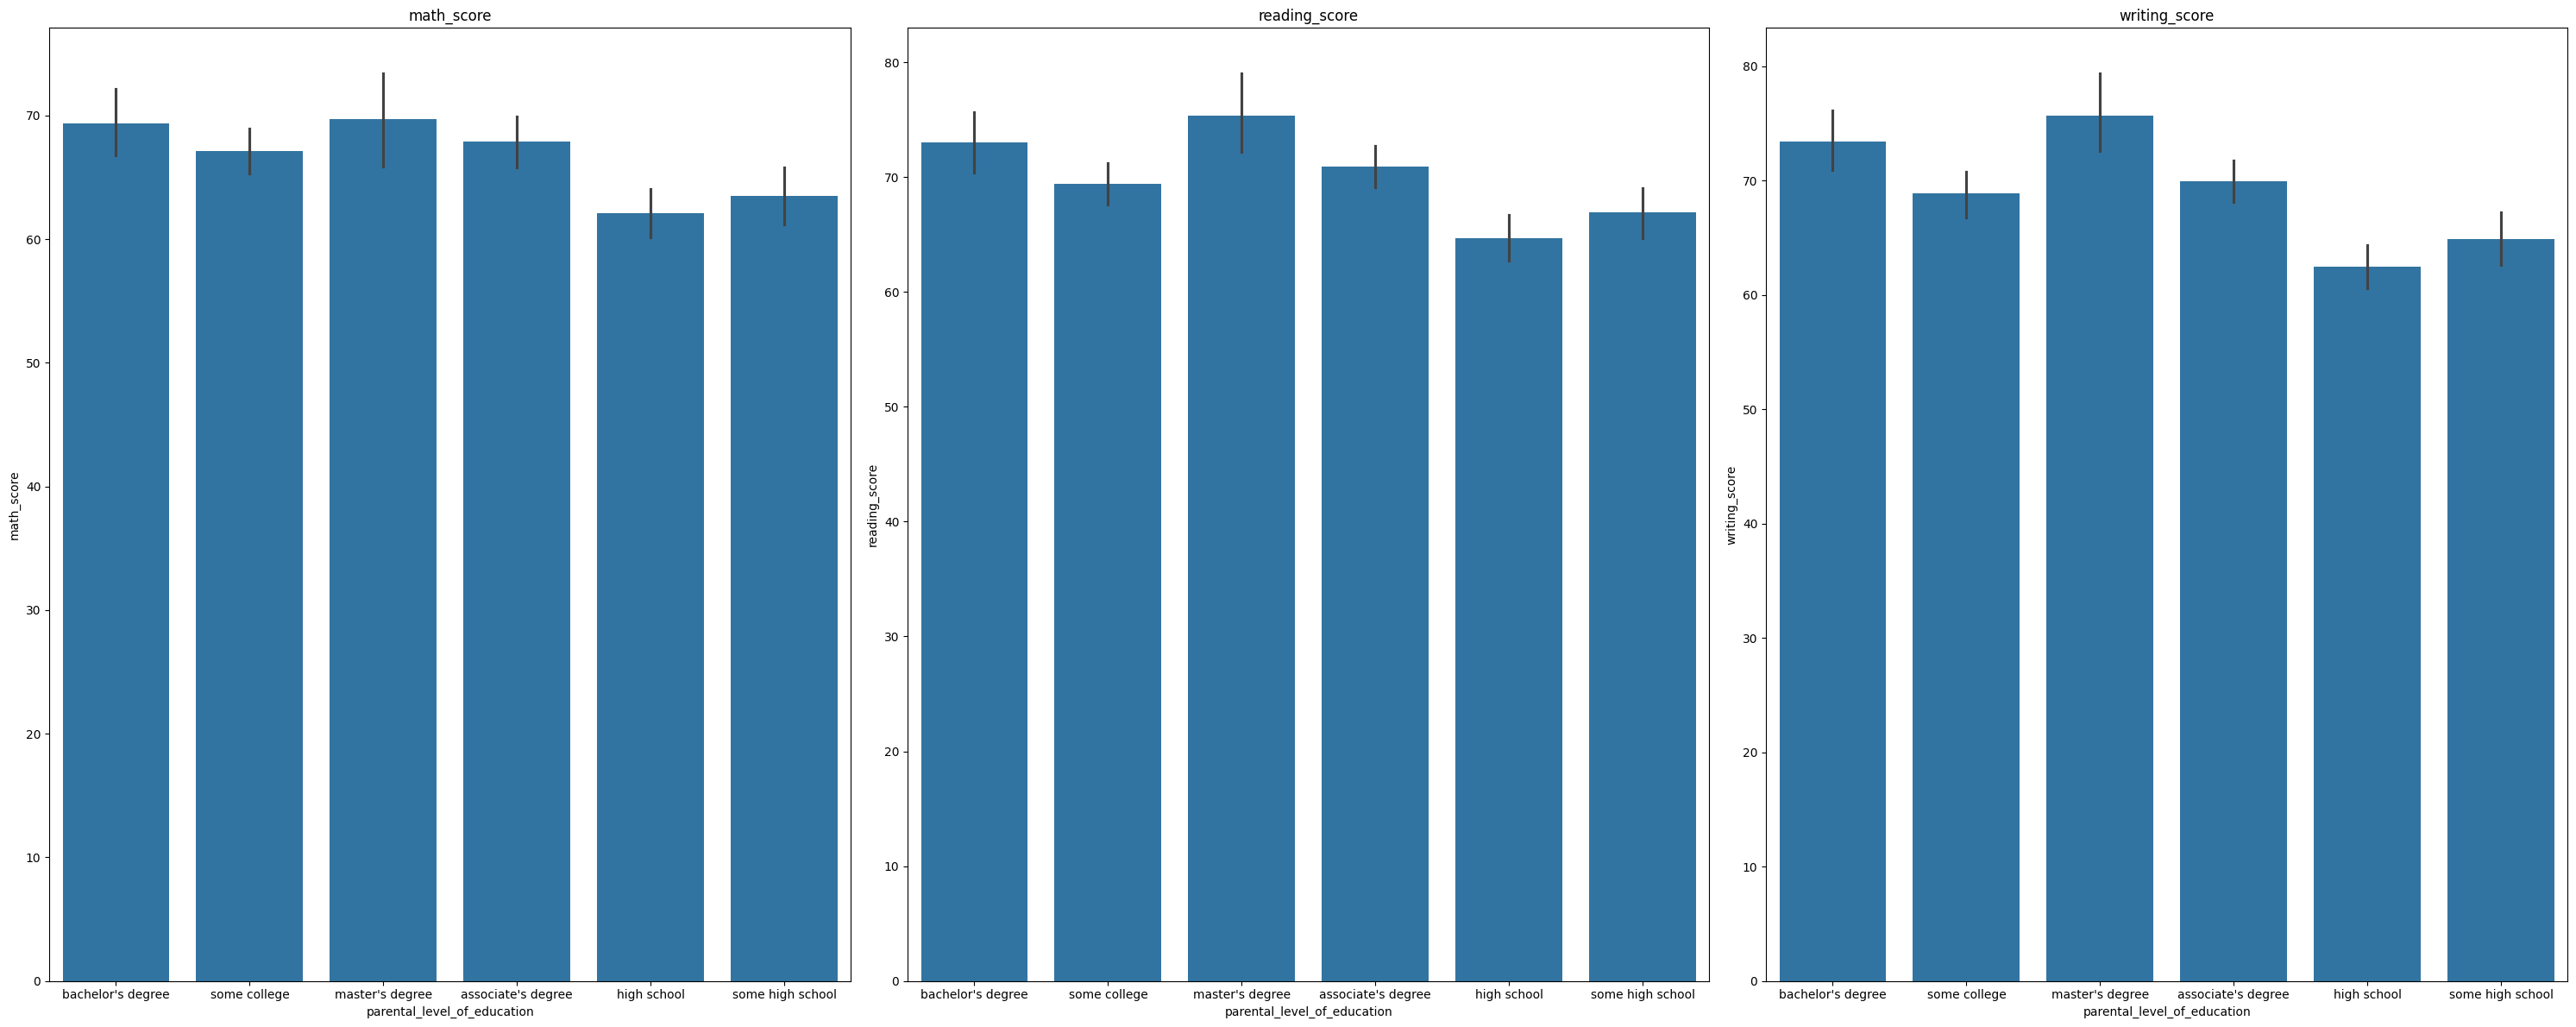

In [68]:
# Parental Level of Education comparison for each subject
fig,axes=plt.subplots(1,len(numerical_columns),figsize=(30,12))

for i,col in enumerate(numerical_columns):
    sns.barplot(data=df,x='parental_level_of_education',y=col,ax=axes[i],estimator='mean')
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

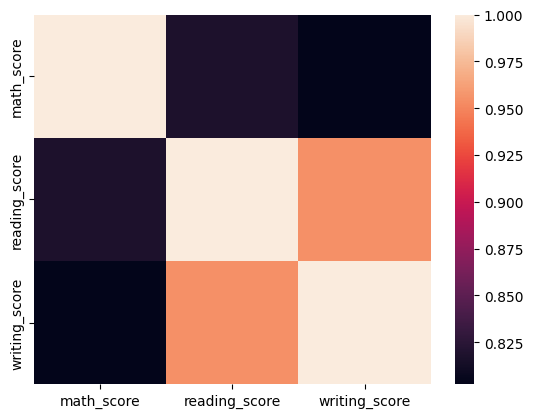

In [69]:
# Multivariate Analysis with Heatmap
numeric_df=df[numerical_columns]
sns.heatmap(numeric_df.corr())
plt.show()